In [5]:
from commons import *
from dataset_loader import load_dataset_with_cache
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
import pickle
from keras.models import load_model


dots_set =  pickle.loads(open('cache/ok/dataset_dots_100.pickle', "rb").read())[0]
worms_set =  pickle.loads(open('cache/ok/dataset_worms_100.pickle', "rb").read())[0]
tracks_set =  pickle.loads(open('cache/ok/dataset_tracks_100.pickle', "rb").read())[0]
artifacts_set =  pickle.loads(open('cache/ok/dataset_artifacts_100.pickle', "rb").read())[0]

dots_autoencoder = load_model('cache/ok/original_dots.h5')
worms_autoencoder = load_model('cache/ok/original_worms.h5')
tracks_autoencoder = load_model('cache/ok/original_tracks.h5')
artifacts_autoencoder = load_model('cache/ok/original_artifacts.h5')

In [31]:
def compute_errors(images, decoded, dm_func):
    errors = []
    for (image, recon) in zip(images, decoded):
        mse = dm_func(image, recon)
        errors.append(mse)
    return errors


def comparision(autoencoder, dm_funcs_and_names, channel_name):
    dots_reconstruction = autoencoder.predict(dots_set)
    worms_reconstruction = autoencoder.predict(worms_set)
    tracks_reconstruction = autoencoder.predict(tracks_set)
    artifacts_reconstruction = autoencoder.predict(artifacts_set)

    for df_func, df_name in dm_funcs_and_names:
        plt.figure(figsize=(16,12))
        plt.hist(compute_errors(dots_set, dots_reconstruction, df_func), bins=100, alpha=0.5, label='Dots')
        plt.hist(compute_errors(worms_set, worms_reconstruction, df_func), bins=100, alpha=0.5, label='Worms')
        plt.hist(compute_errors(tracks_set, tracks_reconstruction, df_func), bins=100, alpha=0.5, label='Tracks')
        plt.hist(compute_errors(artifacts_set, artifacts_reconstruction, df_func), bins=100, alpha=0.5, label='Artifacts')
        plt.xlabel("Data", size=14)
        plt.ylabel("Count", size=14)
        plt.title('%s channel, compare method: %s' % (channel_name, df_name))
        plt.legend(loc='upper right')
        plt.savefig('test.png')


funcs_and_names = zip([
	dm_func_mean, dm_func_avg_hash, dm_func_p_hash, dm_func_d_hash, dm_func_haar_hash, dm_func_db4_hash
], ['mean', 'aHashref', 'pHashref', 'dHashref', 'wHashref_haar', 'wHashref_db4'])

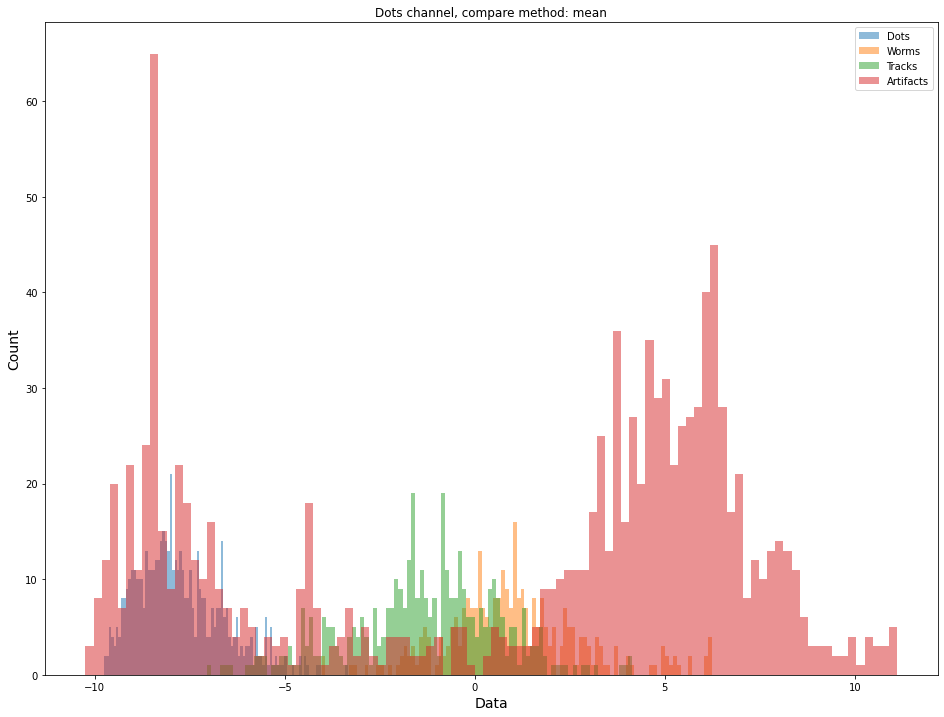

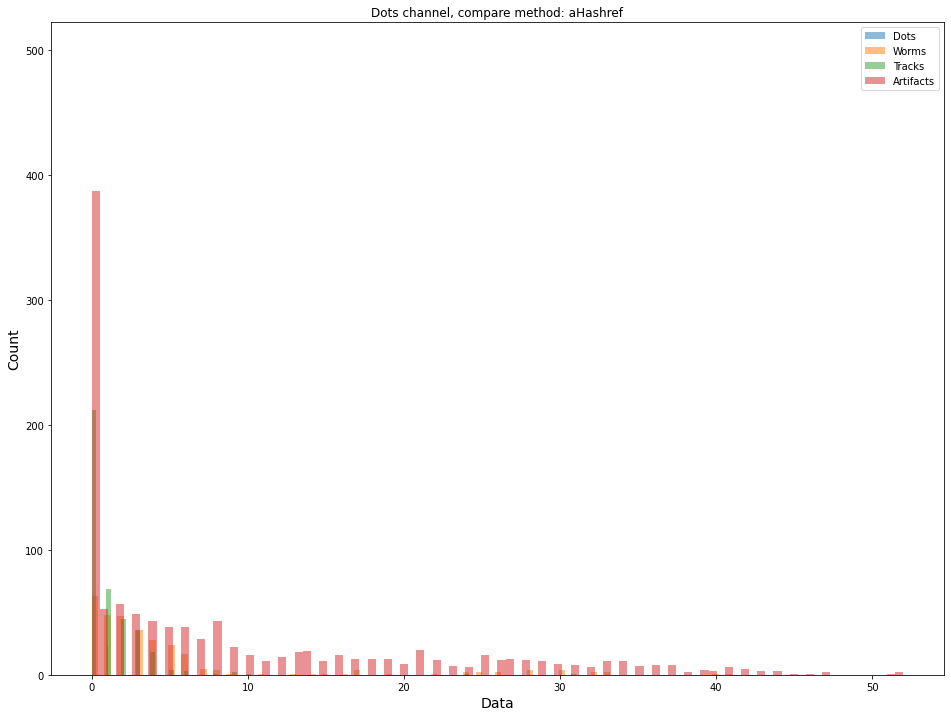

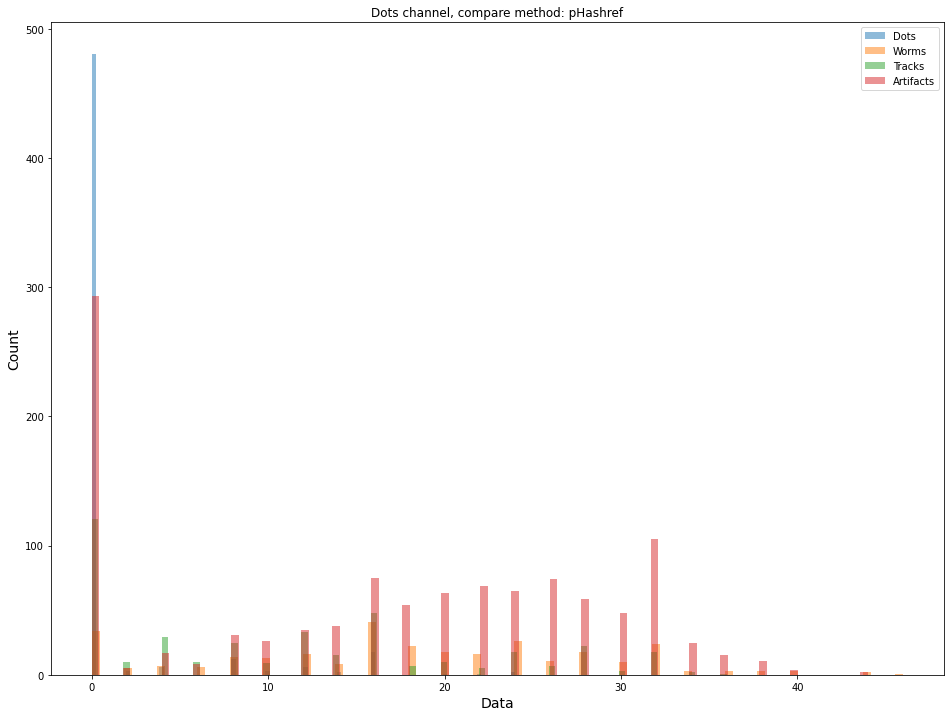

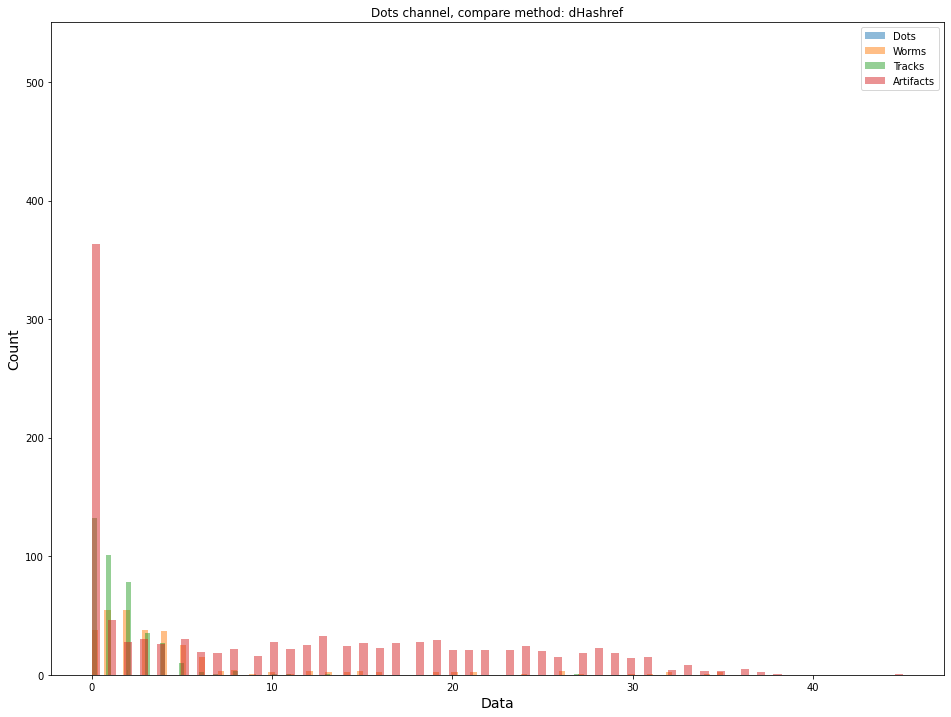

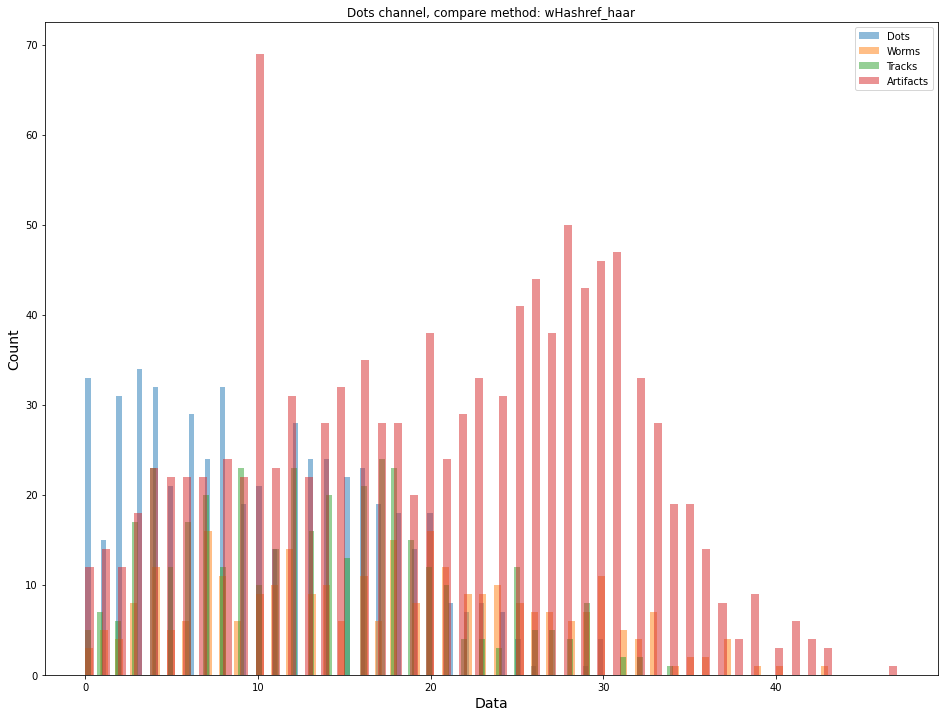

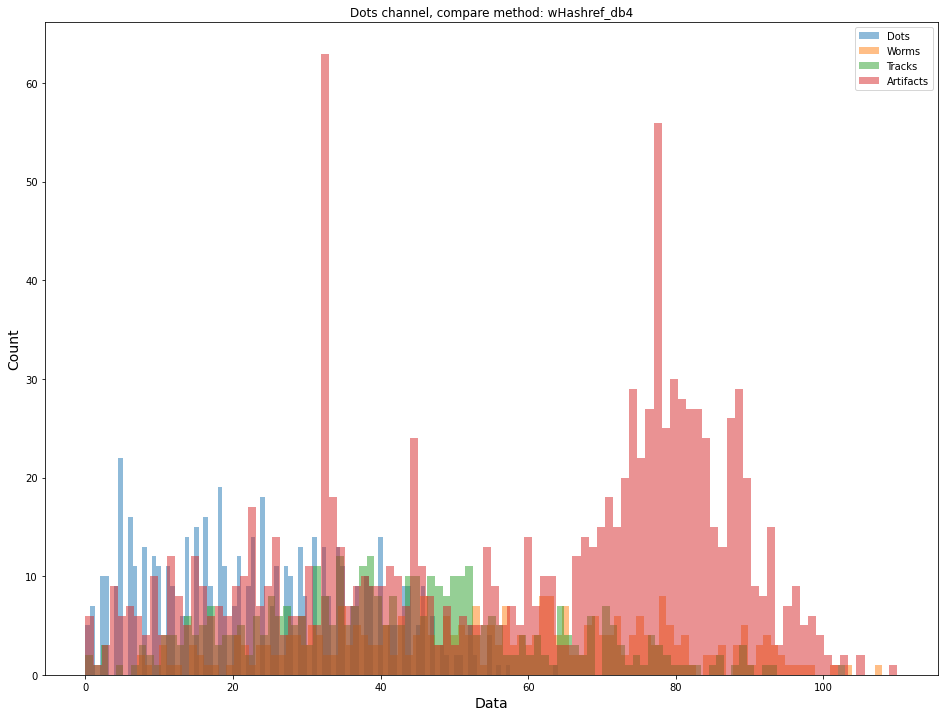

In [18]:
comparision(dots_autoencoder, funcs_and_names, 'Dots')

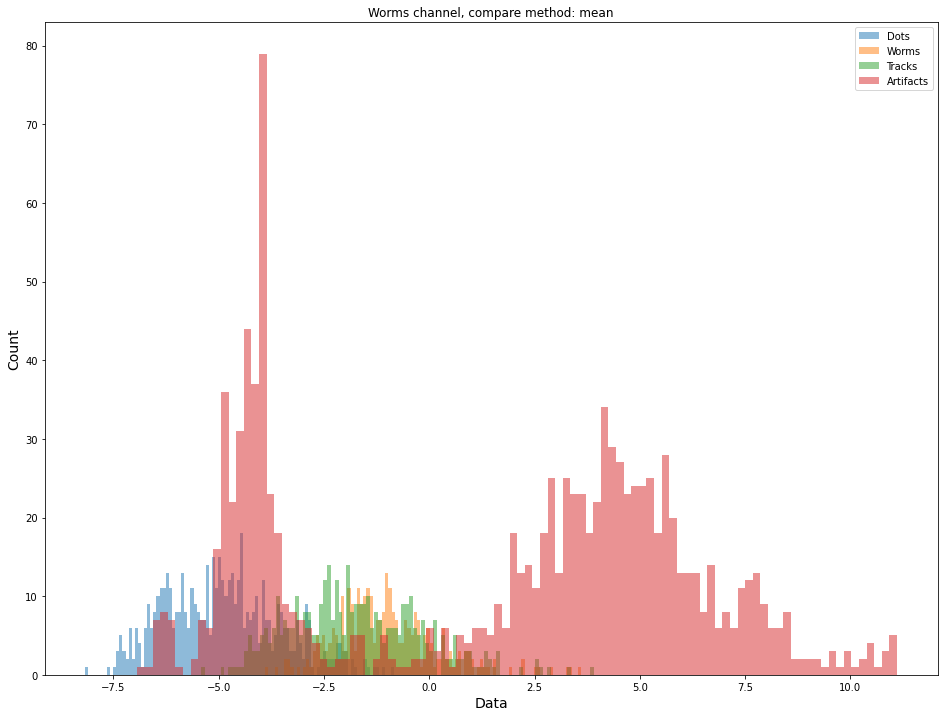

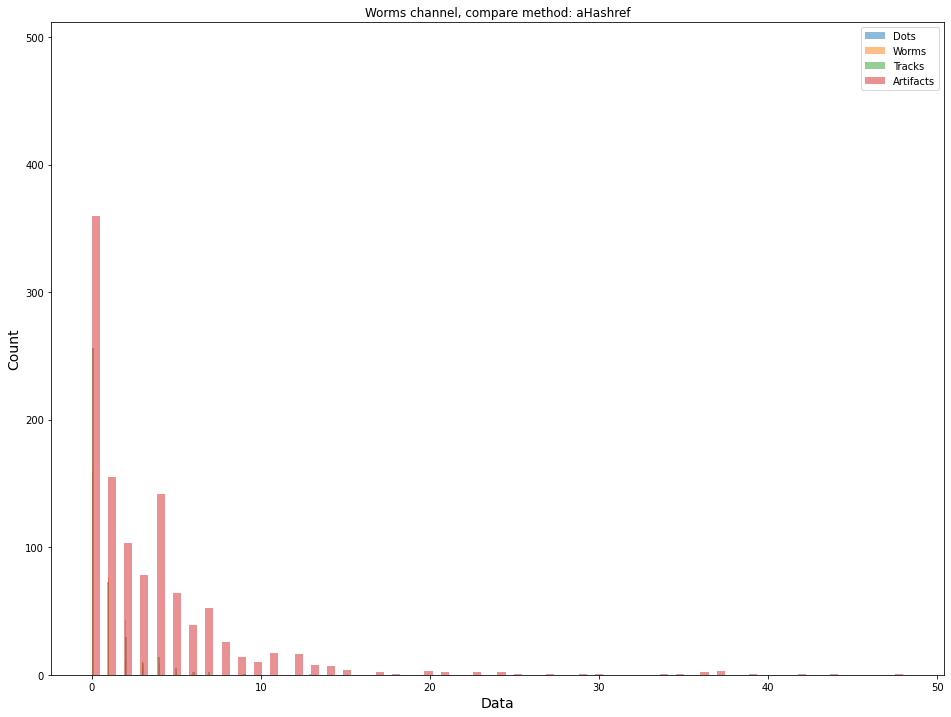

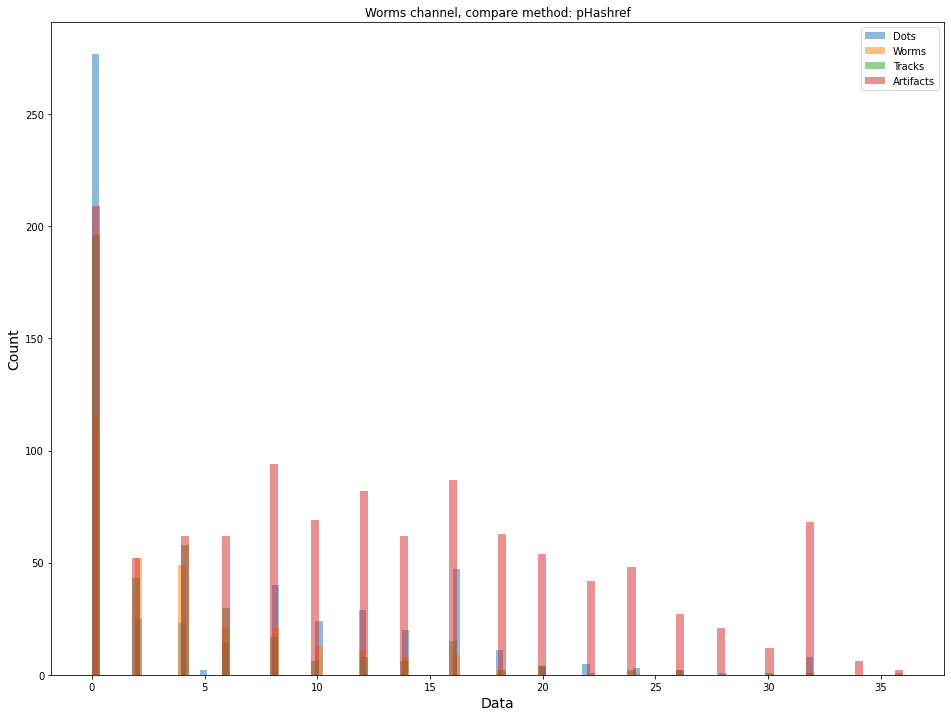

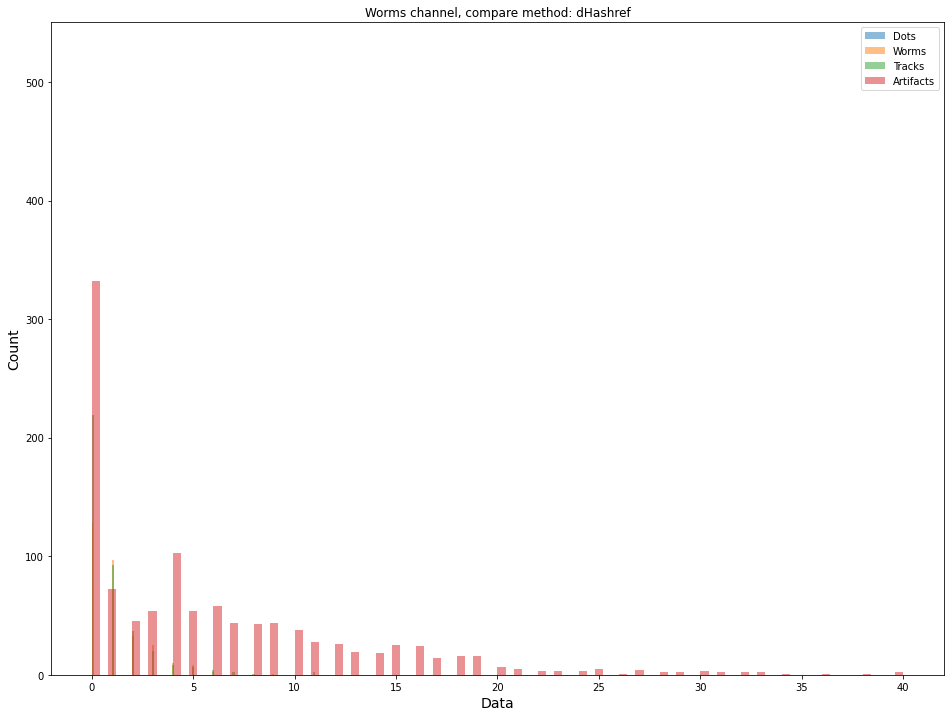

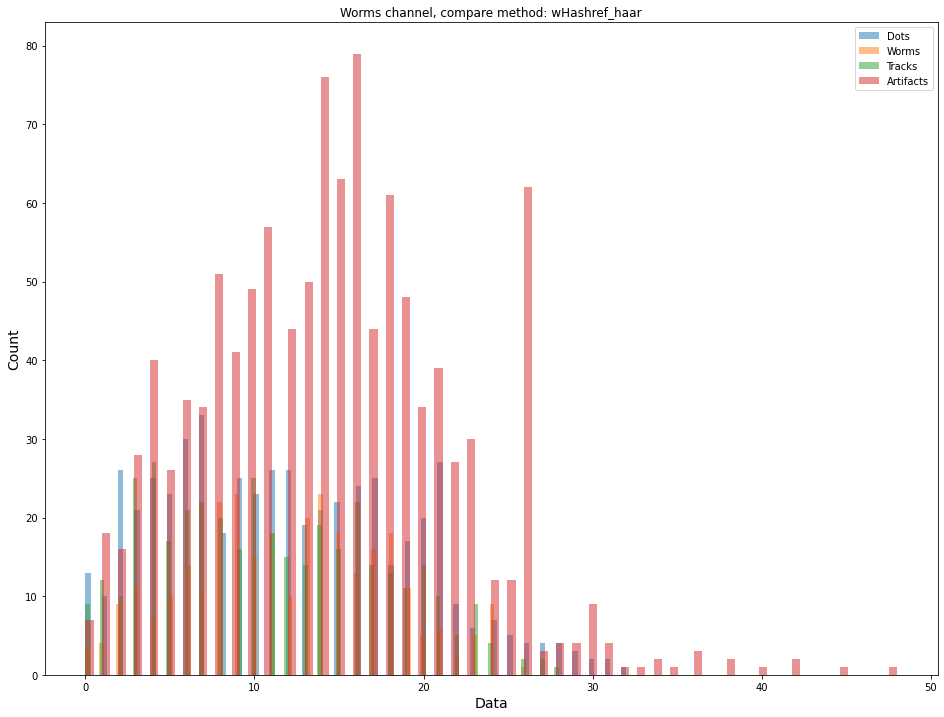

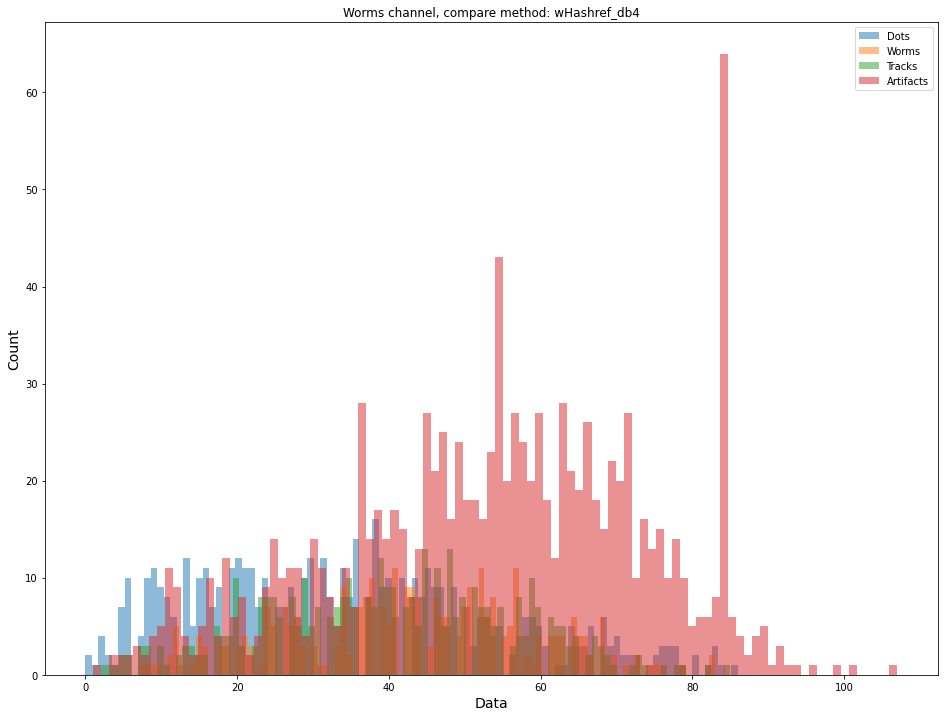

In [27]:
comparision(worms_autoencoder, funcs_and_names, 'Worms')

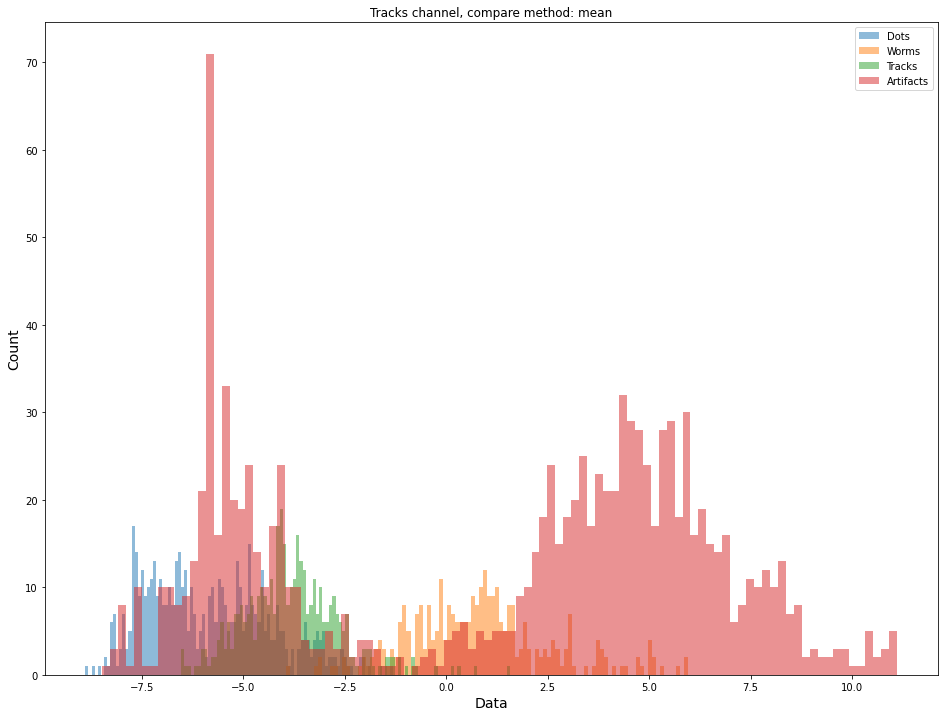

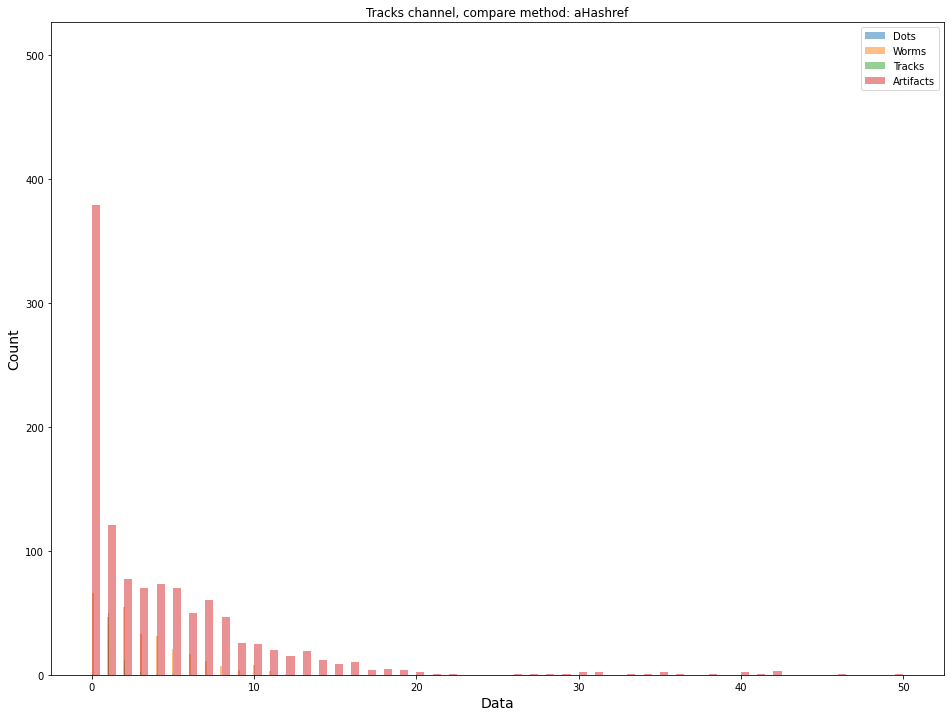

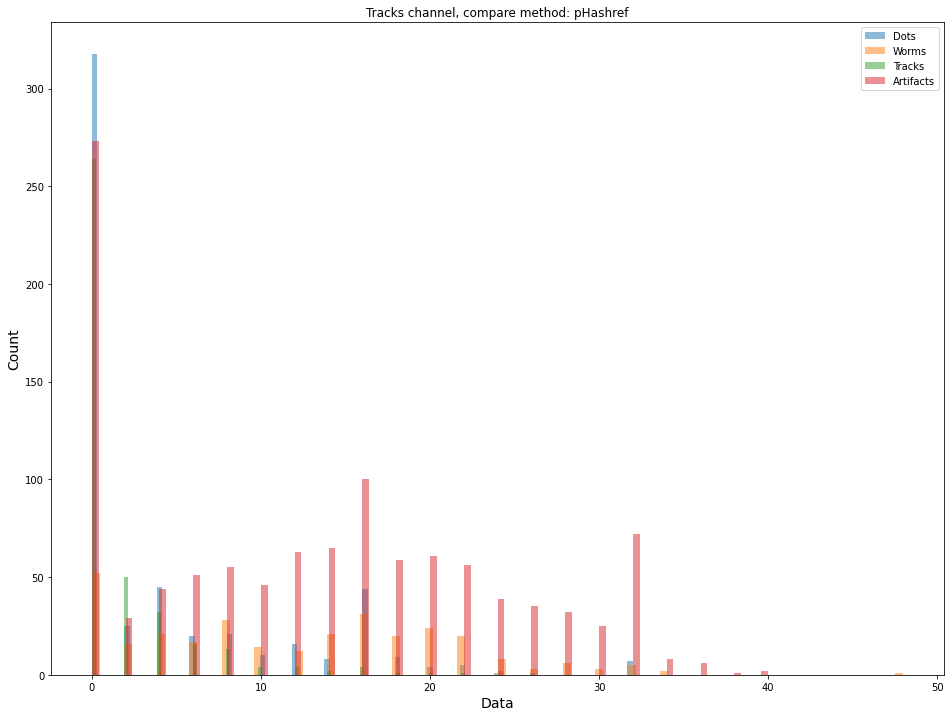

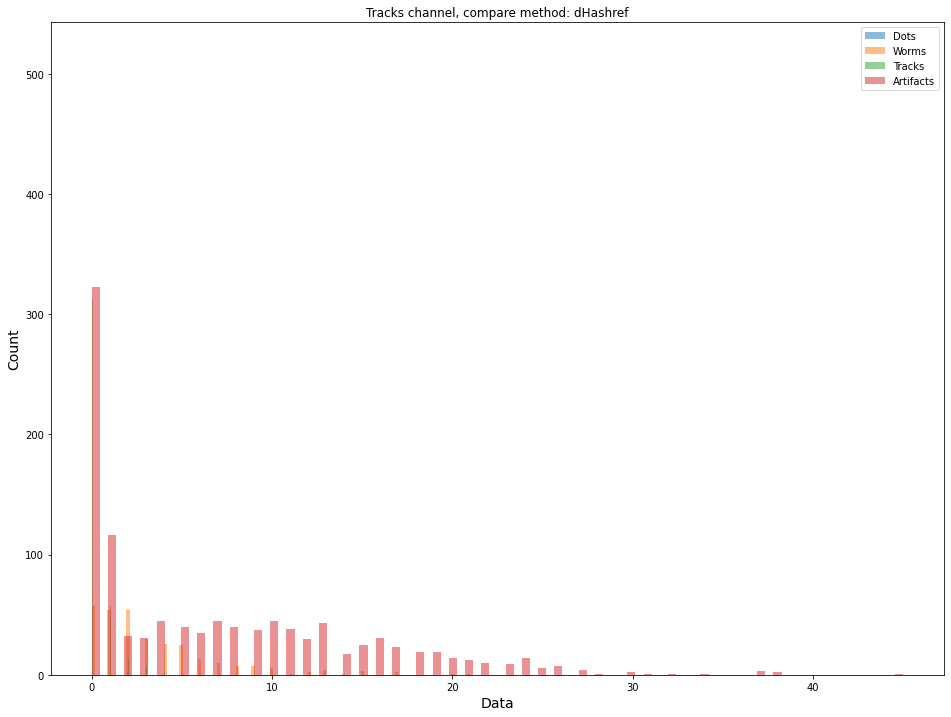

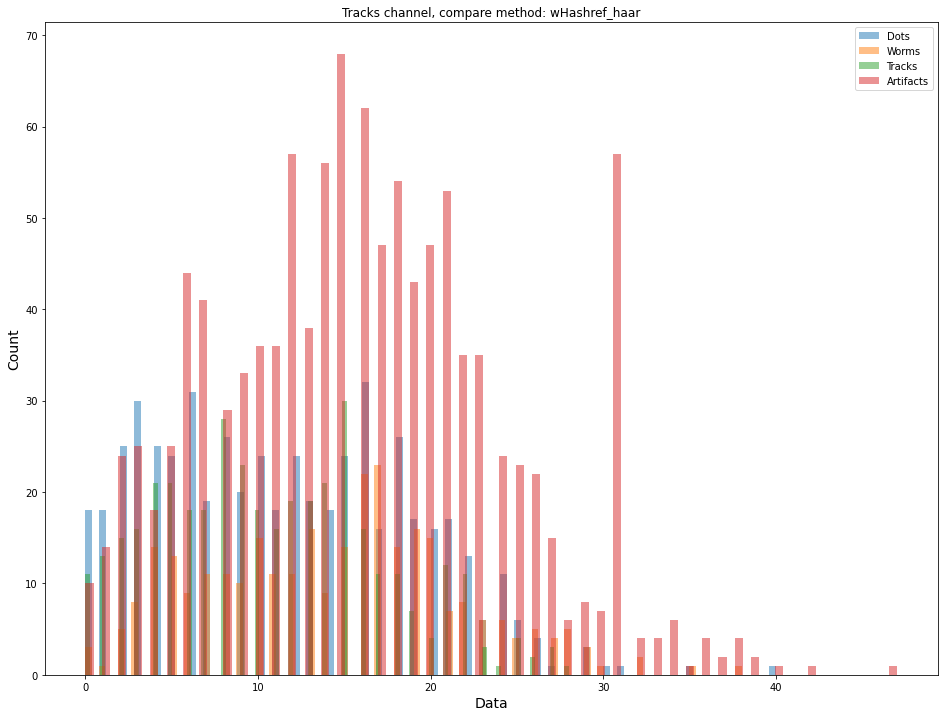

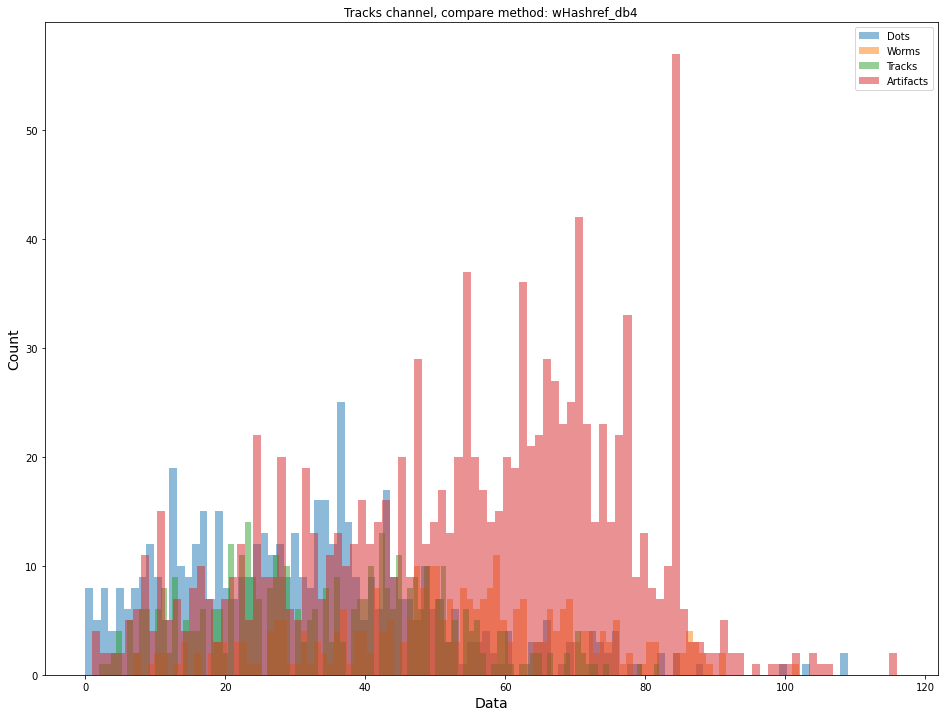

In [30]:
comparision(tracks_autoencoder, funcs_and_names, 'Tracks')

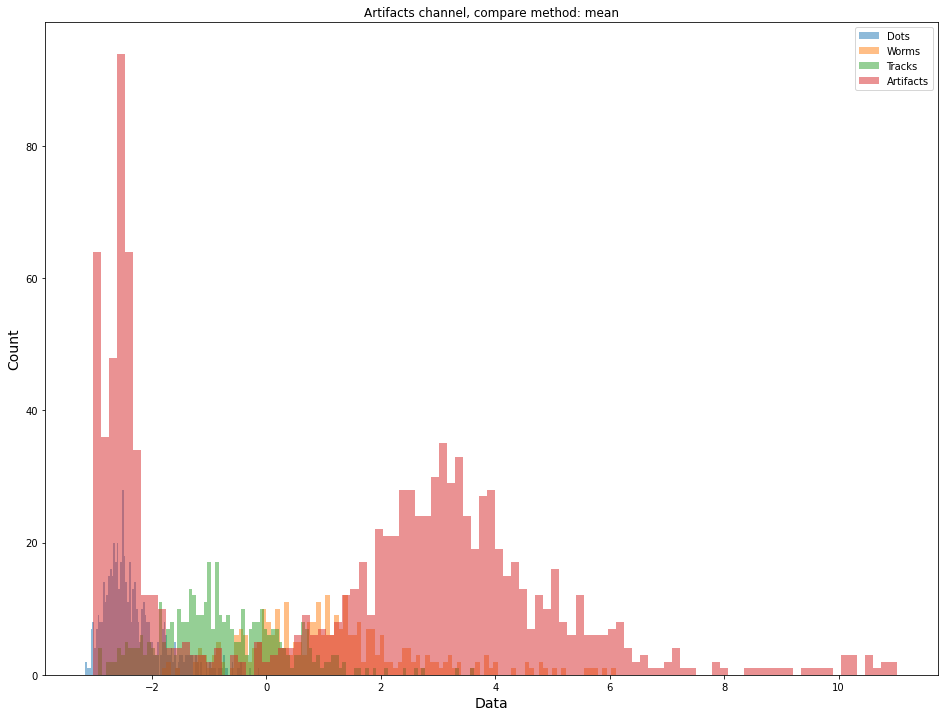

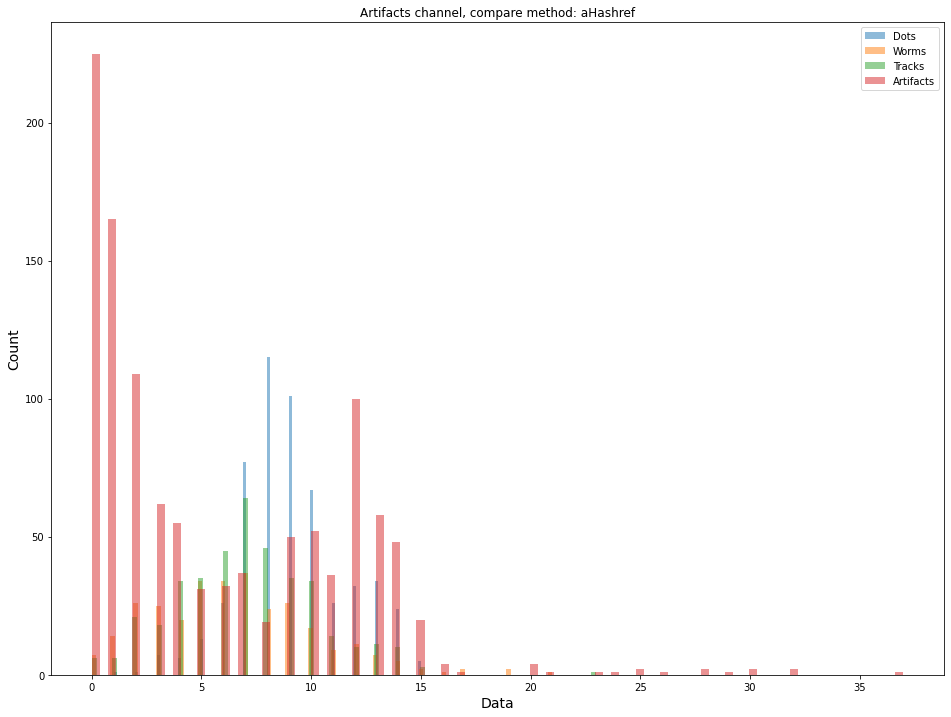

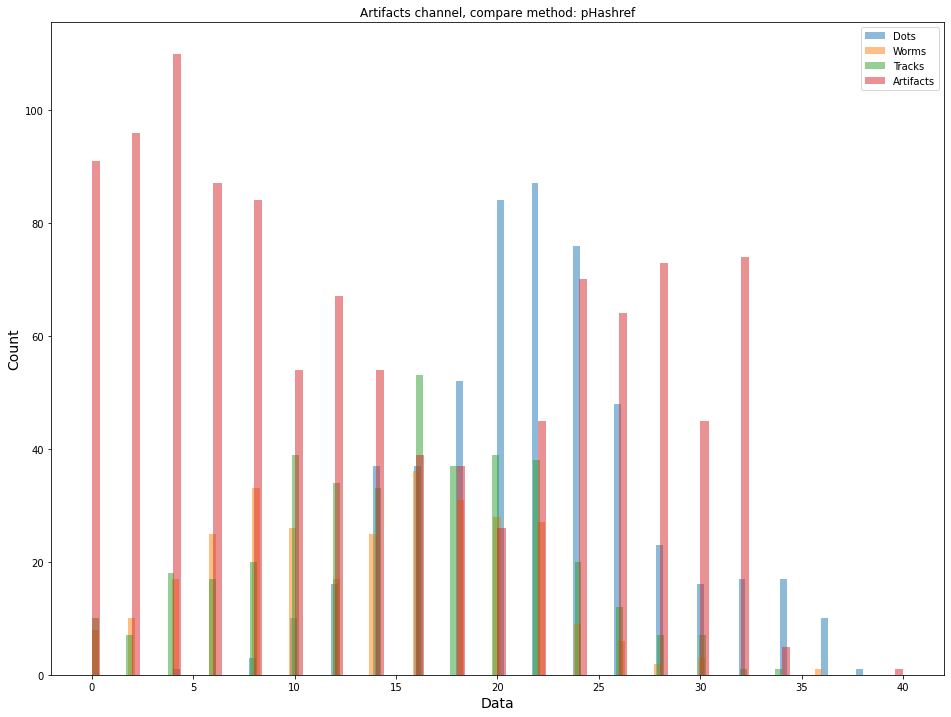

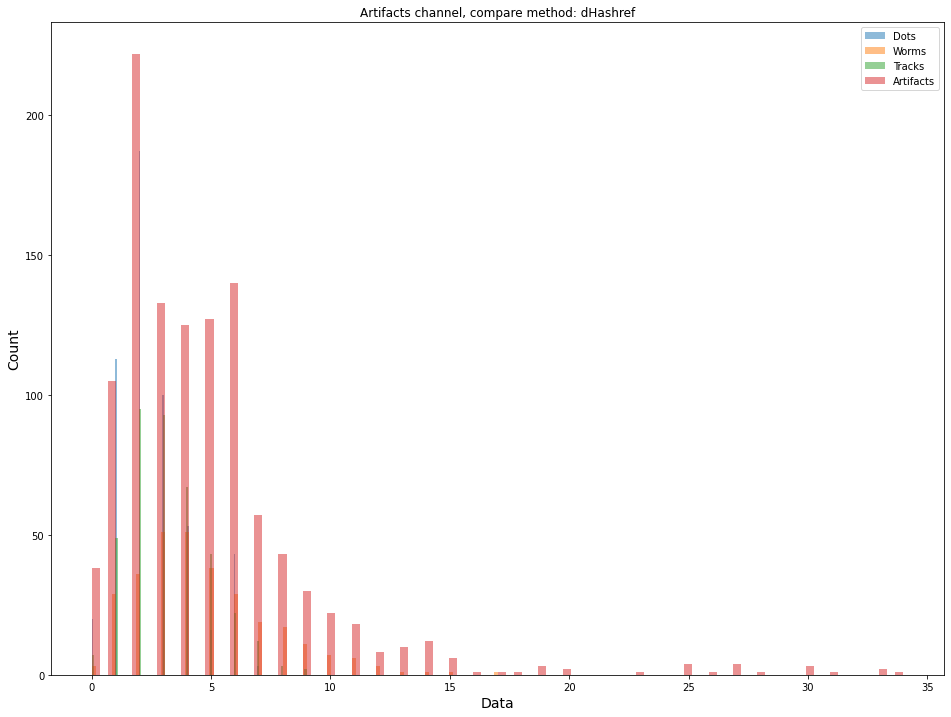

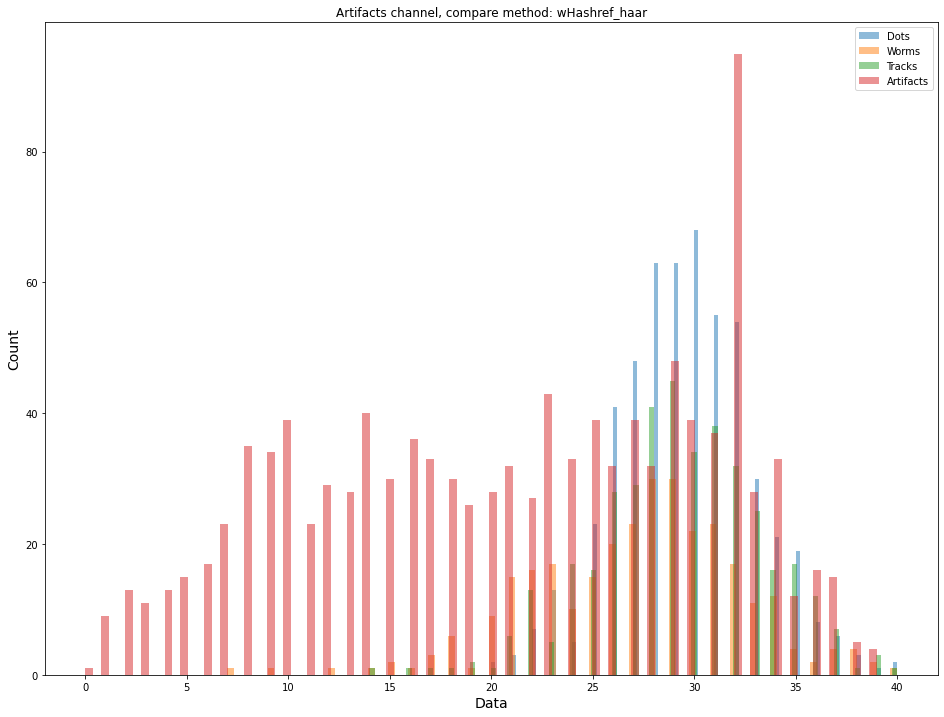

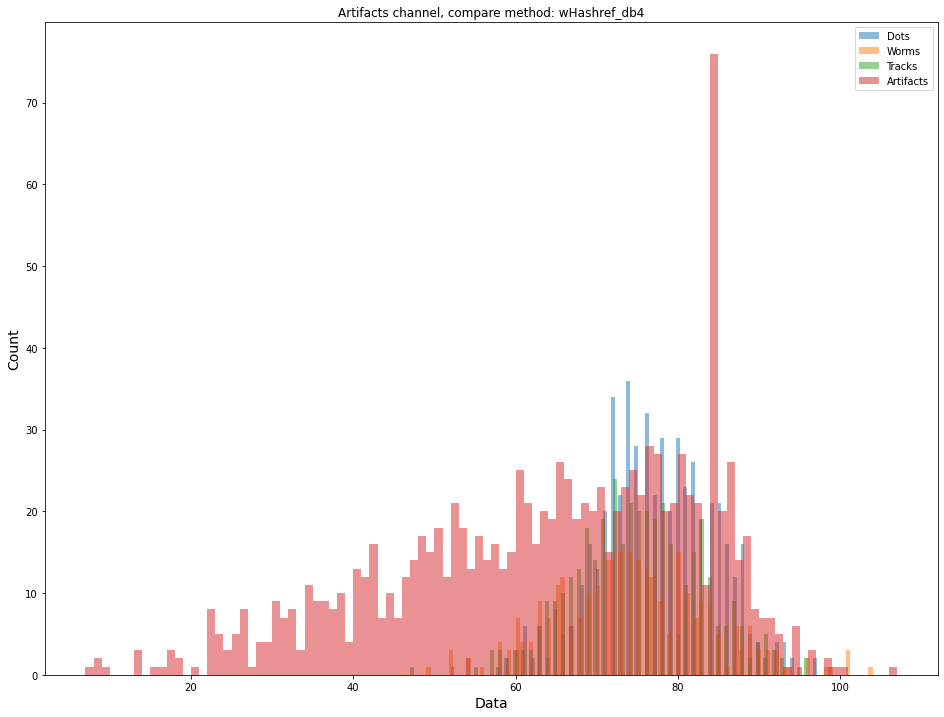

In [32]:
comparision(artifacts_autoencoder, funcs_and_names, 'Artifacts')